In [81]:
# Importing all the necessary libraries and packages

import pandas as pd
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [82]:
flights = pd.read_csv('flights.csv')
flights

C:\Users\SAM\AppData\Local\Temp\ipykernel_1892\3751038646.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
flights_data = flights[0:200000] # Taking just first 200000 samples to reduce the calculation time

In [84]:
flights_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2015,1,13,2,AA,2457,N487AA,DFW,LAS,2240,...,2326.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199996,2015,1,13,2,DL,1542,N3769L,SEA,JFK,2240,...,721.0,37.0,0,0,NaN,30.0,0.0,7.0,0.0,0.0
199997,2015,1,13,2,AA,2386,N561AA,DFW,AUS,2240,...,2341.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199998,2015,1,13,2,NK,199,N533NK,IAH,LAS,2240,...,2330.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 200000 non-null  int64  
 1   MONTH                200000 non-null  int64  
 2   DAY                  200000 non-null  int64  
 3   DAY_OF_WEEK          200000 non-null  int64  
 4   AIRLINE              200000 non-null  object 
 5   FLIGHT_NUMBER        200000 non-null  int64  
 6   TAIL_NUMBER          199598 non-null  object 
 7   ORIGIN_AIRPORT       200000 non-null  object 
 8   DESTINATION_AIRPORT  200000 non-null  object 
 9   SCHEDULED_DEPARTURE  200000 non-null  int64  
 10  DEPARTURE_TIME       195132 non-null  float64
 11  DEPARTURE_DELAY      195132 non-null  float64
 12  TAXI_OUT             194975 non-null  float64
 13  WHEELS_OFF           194975 non-null  float64
 14  SCHEDULED_TIME       200000 non-null  float64
 15  ELAPSED_TIME     

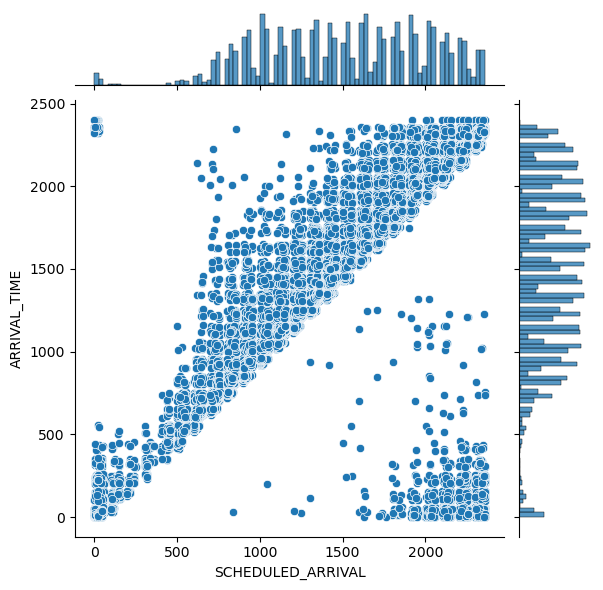

In [86]:
sb.jointplot(data=flights_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [88]:
cor=flights_data.corrwith(flights_data["ARRIVAL_DELAY"])

In [89]:
cor

YEAR                        NaN
MONTH                       NaN
DAY                   -0.062116
DAY_OF_WEEK            0.017974
FLIGHT_NUMBER          0.066741
SCHEDULED_DEPARTURE    0.120760
DEPARTURE_TIME         0.200282
DEPARTURE_DELAY        0.949311
TAXI_OUT               0.253376
WHEELS_OFF             0.192835
SCHEDULED_TIME        -0.044355
ELAPSED_TIME           0.026681
AIR_TIME              -0.027205
DISTANCE              -0.042567
WHEELS_ON              0.074704
TAXI_IN                0.182982
SCHEDULED_ARRIVAL      0.110813
ARRIVAL_TIME           0.064320
ARRIVAL_DELAY          1.000000
DIVERTED                    NaN
CANCELLED                   NaN
AIR_SYSTEM_DELAY       0.272275
SECURITY_DELAY         0.002480
AIRLINE_DELAY          0.561757
LATE_AIRCRAFT_DELAY    0.564060
WEATHER_DELAY          0.283222
dtype: float64

In [91]:
# Dropping less important or unnecessary columns

flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1)

In [92]:
# Filling NaN with mean of that particular column

flights_data=flights_data.fillna(flights_data.mean())

In [93]:
# inserting new column named, result to check flight is delayed or not

result=[]

In [94]:
# Flight delayed more than 15 min is considered to be delayed

for row in flights_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)

In [95]:
flights_data['result'] = result

In [96]:
flights_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,-22.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
1,1,1,10,-8.0,750,-9.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
2,1,1,20,-2.0,806,5.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
3,1,1,20,-5.0,805,-9.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
4,1,1,25,-1.0,320,-21.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,13,2240,-6.0,2336,-10.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
199996,1,13,2240,7.0,644,37.0,0,0,30.000000,0.000000,7.000000,0.00000,0.000000,1
199997,1,13,2240,8.0,2331,10.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
199998,1,13,2240,-12.0,2356,-26.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0


In [97]:
flights_data.value_counts('result')

result
0    142245
1     57755
dtype: int64

In [98]:
# Removing arrival_delay column

flights_data=flights_data.drop(['ARRIVAL_DELAY'],axis=1)

In [99]:
flights_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
1,1,1,10,-8.0,750,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
2,1,1,20,-2.0,806,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
3,1,1,20,-5.0,805,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
4,1,1,25,-1.0,320,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,13,2240,-6.0,2336,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
199996,1,13,2240,7.0,644,0,0,30.000000,0.000000,7.000000,0.00000,0.000000,1
199997,1,13,2240,8.0,2331,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
199998,1,13,2240,-12.0,2356,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0


In [100]:
# Spliting Data into train and test

data = flights_data.values
X, y = data[:,:-1], data[:,-1] # First 12 colums of data are input and last column is target or output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [101]:
# Standardizing or normalizing data
scaled_features = StandardScaler().fit_transform(X_train, X_test)

# DecisionTreeClassifier

In [102]:
# Model=DecisionTreeClassifier from sklearn
# Model Training
DTCModel = DecisionTreeClassifier()
DTCModel = DTCModel.fit(X_train,y_train)

In [103]:
# Prediction on Test Data
DTCModel_pred = DTCModel.predict_proba(X_test)
auc_score1 = roc_auc_score(y_test, DTCModel_pred[:,1])
auc_score1

0.9985545470424667

# XGBoost Classifier

In [104]:
XGBModel = xgb.XGBClassifier()

In [105]:
XGBModel=XGBModel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
# Prediction on Test Data
XGBModel_pred = XGBModel.predict_proba(X_test)
auc_score2 = roc_auc_score(y_test, XGBModel_pred[:,1])
auc_score2

0.9999978416065003

# Light GBM Classifier

In [107]:
LGModel = lgb.LGBMClassifier()

In [108]:
LGModel=LGModel.fit(X_train,y_train)

In [109]:
LGModel_pred = LGModel.predict_proba(X_test)
auc_score3 = roc_auc_score(y_test, LGModel_pred[:,1])
auc_score3

0.9999973077665513

# CatBoost Classifier

In [110]:
CBModel=cb.CatBoostClassifier()

In [111]:
CBModel=CBModel.fit(X_train,y_train)

Learning rate set to 0.084983
0:	learn: 0.4690170	total: 391ms	remaining: 6m 30s
1:	learn: 0.2996781	total: 459ms	remaining: 3m 49s
2:	learn: 0.1852005	total: 498ms	remaining: 2m 45s
3:	learn: 0.1116917	total: 539ms	remaining: 2m 14s
4:	learn: 0.0808379	total: 579ms	remaining: 1m 55s
5:	learn: 0.0599050	total: 637ms	remaining: 1m 45s
6:	learn: 0.0475611	total: 688ms	remaining: 1m 37s
7:	learn: 0.0379224	total: 737ms	remaining: 1m 31s
8:	learn: 0.0324625	total: 786ms	remaining: 1m 26s
9:	learn: 0.0282487	total: 836ms	remaining: 1m 22s
10:	learn: 0.0252992	total: 897ms	remaining: 1m 20s
11:	learn: 0.0242418	total: 951ms	remaining: 1m 18s
12:	learn: 0.0218021	total: 1s	remaining: 1m 15s
13:	learn: 0.0203836	total: 1.05s	remaining: 1m 13s
14:	learn: 0.0194404	total: 1.1s	remaining: 1m 11s
15:	learn: 0.0184509	total: 1.15s	remaining: 1m 10s
16:	learn: 0.0168790	total: 1.2s	remaining: 1m 9s
17:	learn: 0.0163685	total: 1.24s	remaining: 1m 7s
18:	learn: 0.0159802	total: 1.29s	remaining: 1m 6s


161:	learn: 0.0035403	total: 7.66s	remaining: 39.6s
162:	learn: 0.0035107	total: 7.71s	remaining: 39.6s
163:	learn: 0.0035107	total: 7.75s	remaining: 39.5s
164:	learn: 0.0035107	total: 7.78s	remaining: 39.4s
165:	learn: 0.0035107	total: 7.82s	remaining: 39.3s
166:	learn: 0.0035107	total: 7.86s	remaining: 39.2s
167:	learn: 0.0035107	total: 7.89s	remaining: 39.1s
168:	learn: 0.0035107	total: 7.92s	remaining: 38.9s
169:	learn: 0.0035068	total: 7.95s	remaining: 38.8s
170:	learn: 0.0035024	total: 7.99s	remaining: 38.8s
171:	learn: 0.0034713	total: 8.04s	remaining: 38.7s
172:	learn: 0.0034629	total: 8.07s	remaining: 38.6s
173:	learn: 0.0034629	total: 8.1s	remaining: 38.5s
174:	learn: 0.0034629	total: 8.14s	remaining: 38.4s
175:	learn: 0.0034596	total: 8.17s	remaining: 38.3s
176:	learn: 0.0034383	total: 8.21s	remaining: 38.2s
177:	learn: 0.0034126	total: 8.25s	remaining: 38.1s
178:	learn: 0.0033936	total: 8.29s	remaining: 38s
179:	learn: 0.0033668	total: 8.33s	remaining: 38s
180:	learn: 0.003

323:	learn: 0.0033531	total: 12.9s	remaining: 26.9s
324:	learn: 0.0033531	total: 12.9s	remaining: 26.9s
325:	learn: 0.0033531	total: 13s	remaining: 26.8s
326:	learn: 0.0033531	total: 13s	remaining: 26.8s
327:	learn: 0.0033531	total: 13.1s	remaining: 26.8s
328:	learn: 0.0033531	total: 13.1s	remaining: 26.7s
329:	learn: 0.0033531	total: 13.1s	remaining: 26.7s
330:	learn: 0.0033531	total: 13.2s	remaining: 26.6s
331:	learn: 0.0033531	total: 13.2s	remaining: 26.6s
332:	learn: 0.0033531	total: 13.3s	remaining: 26.6s
333:	learn: 0.0033531	total: 13.3s	remaining: 26.5s
334:	learn: 0.0033531	total: 13.4s	remaining: 26.5s
335:	learn: 0.0033531	total: 13.4s	remaining: 26.5s
336:	learn: 0.0033531	total: 13.4s	remaining: 26.4s
337:	learn: 0.0033531	total: 13.5s	remaining: 26.4s
338:	learn: 0.0033531	total: 13.5s	remaining: 26.4s
339:	learn: 0.0033531	total: 13.6s	remaining: 26.4s
340:	learn: 0.0033531	total: 13.6s	remaining: 26.3s
341:	learn: 0.0033531	total: 13.7s	remaining: 26.3s
342:	learn: 0.00

487:	learn: 0.0033531	total: 18.9s	remaining: 19.8s
488:	learn: 0.0033531	total: 18.9s	remaining: 19.8s
489:	learn: 0.0033531	total: 19s	remaining: 19.8s
490:	learn: 0.0033531	total: 19s	remaining: 19.7s
491:	learn: 0.0033531	total: 19s	remaining: 19.7s
492:	learn: 0.0033531	total: 19.1s	remaining: 19.6s
493:	learn: 0.0033531	total: 19.1s	remaining: 19.6s
494:	learn: 0.0033531	total: 19.1s	remaining: 19.5s
495:	learn: 0.0033531	total: 19.2s	remaining: 19.5s
496:	learn: 0.0033531	total: 19.2s	remaining: 19.4s
497:	learn: 0.0033531	total: 19.2s	remaining: 19.4s
498:	learn: 0.0033531	total: 19.3s	remaining: 19.4s
499:	learn: 0.0033531	total: 19.3s	remaining: 19.3s
500:	learn: 0.0033531	total: 19.3s	remaining: 19.3s
501:	learn: 0.0033531	total: 19.4s	remaining: 19.2s
502:	learn: 0.0033531	total: 19.4s	remaining: 19.2s
503:	learn: 0.0033531	total: 19.5s	remaining: 19.1s
504:	learn: 0.0033531	total: 19.5s	remaining: 19.1s
505:	learn: 0.0033531	total: 19.5s	remaining: 19.1s
506:	learn: 0.0033

647:	learn: 0.0033531	total: 23.7s	remaining: 12.9s
648:	learn: 0.0033531	total: 23.7s	remaining: 12.8s
649:	learn: 0.0033531	total: 23.7s	remaining: 12.8s
650:	learn: 0.0033531	total: 23.7s	remaining: 12.7s
651:	learn: 0.0033531	total: 23.8s	remaining: 12.7s
652:	learn: 0.0033531	total: 23.8s	remaining: 12.6s
653:	learn: 0.0033531	total: 23.8s	remaining: 12.6s
654:	learn: 0.0033531	total: 23.9s	remaining: 12.6s
655:	learn: 0.0033531	total: 23.9s	remaining: 12.5s
656:	learn: 0.0033531	total: 23.9s	remaining: 12.5s
657:	learn: 0.0033531	total: 23.9s	remaining: 12.4s
658:	learn: 0.0033531	total: 24s	remaining: 12.4s
659:	learn: 0.0033531	total: 24s	remaining: 12.4s
660:	learn: 0.0033531	total: 24s	remaining: 12.3s
661:	learn: 0.0033531	total: 24s	remaining: 12.3s
662:	learn: 0.0033531	total: 24.1s	remaining: 12.2s
663:	learn: 0.0033531	total: 24.1s	remaining: 12.2s
664:	learn: 0.0033531	total: 24.1s	remaining: 12.2s
665:	learn: 0.0033531	total: 24.2s	remaining: 12.1s
666:	learn: 0.003353

808:	learn: 0.0033531	total: 28.8s	remaining: 6.81s
809:	learn: 0.0033531	total: 28.9s	remaining: 6.77s
810:	learn: 0.0033531	total: 28.9s	remaining: 6.74s
811:	learn: 0.0033531	total: 28.9s	remaining: 6.7s
812:	learn: 0.0033531	total: 29s	remaining: 6.67s
813:	learn: 0.0033531	total: 29s	remaining: 6.63s
814:	learn: 0.0033531	total: 29.1s	remaining: 6.6s
815:	learn: 0.0033531	total: 29.1s	remaining: 6.56s
816:	learn: 0.0033531	total: 29.1s	remaining: 6.53s
817:	learn: 0.0033531	total: 29.2s	remaining: 6.49s
818:	learn: 0.0033531	total: 29.2s	remaining: 6.46s
819:	learn: 0.0033531	total: 29.3s	remaining: 6.42s
820:	learn: 0.0033531	total: 29.3s	remaining: 6.39s
821:	learn: 0.0033531	total: 29.3s	remaining: 6.35s
822:	learn: 0.0033531	total: 29.4s	remaining: 6.32s
823:	learn: 0.0033531	total: 29.4s	remaining: 6.28s
824:	learn: 0.0033531	total: 29.4s	remaining: 6.24s
825:	learn: 0.0033531	total: 29.5s	remaining: 6.21s
826:	learn: 0.0033531	total: 29.5s	remaining: 6.17s
827:	learn: 0.0033

971:	learn: 0.0033531	total: 34.5s	remaining: 993ms
972:	learn: 0.0033531	total: 34.5s	remaining: 958ms
973:	learn: 0.0033531	total: 34.5s	remaining: 922ms
974:	learn: 0.0033531	total: 34.6s	remaining: 886ms
975:	learn: 0.0033531	total: 34.6s	remaining: 851ms
976:	learn: 0.0033531	total: 34.6s	remaining: 815ms
977:	learn: 0.0033531	total: 34.6s	remaining: 779ms
978:	learn: 0.0033531	total: 34.7s	remaining: 744ms
979:	learn: 0.0033531	total: 34.7s	remaining: 708ms
980:	learn: 0.0033531	total: 34.7s	remaining: 673ms
981:	learn: 0.0033531	total: 34.8s	remaining: 637ms
982:	learn: 0.0033531	total: 34.8s	remaining: 602ms
983:	learn: 0.0033531	total: 34.8s	remaining: 566ms
984:	learn: 0.0033531	total: 34.8s	remaining: 531ms
985:	learn: 0.0033531	total: 34.9s	remaining: 495ms
986:	learn: 0.0033531	total: 34.9s	remaining: 460ms
987:	learn: 0.0033531	total: 34.9s	remaining: 424ms
988:	learn: 0.0033531	total: 35s	remaining: 389ms
989:	learn: 0.0033531	total: 35s	remaining: 353ms
990:	learn: 0.00

In [112]:
CBModel_pred = CBModel.predict_proba(X_test)
auc_score4 = roc_auc_score(y_test, CBModel_pred[:,1])
auc_score4

0.9999956574694499